In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Loading & reading the data

In [4]:
df = pd.read_csv('../src/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# Rename columns
df = df.rename(columns={
    'CRIM': 'crime_rate',
    'ZN': 'res_land_share_gt_25k',
    'INDUS': 'nr_comm_acres_share',
    'CHAS': 'charles_river',
    'NOX': 'nox_concentration_pp10m',
    'RM': 'avg_rooms',
    'AGE': 'owner_occ_pre_1940_share',
    'DIS': 'weighted_dist_to_employment_centers',
    'RAD': 'radial_highway_accessibility',
    'TAX': 'property_tax_rate_per_10k',
    'PTRATIO': 'student_teacher_ratio',
    'B': 'black_population_index',
    'LSTAT': 'pct_lower_status',
    'MEDV': 'median_home_value_1k_usd'
})

### Data description

In [14]:
df.describe()

,crime_rate,res_land_share_gt_25k,nr_comm_acres_share,charles_river,nox_concentration_pp10m,avg_rooms,owner_occ_pre_1940_share,weighted_dist_to_employment_centers,radial_highway_accessibility,property_tax_rate_per_10k,student_teacher_ratio,black_population_index,pct_lower_status,median_home_value_1k_usd
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking for null values

In [21]:
df.isnull().sum()

crime_rate                             0
res_land_share_gt_25k                  0
nr_comm_acres_share                    0
charles_river                          0
nox_concentration_pp10m                0
avg_rooms                              0
owner_occ_pre_1940_share               0
weighted_dist_to_employment_centers    0
radial_highway_accessibility           0
property_tax_rate_per_10k              0
student_teacher_ratio                  0
black_population_index                 0
pct_lower_status                       0
median_home_value_1k_usd               0
dtype: int64

### Checking for duplicates

In [19]:
df.duplicated().value_counts()

False    506
Name: count, dtype: int64

### Plotting histograms for all signs

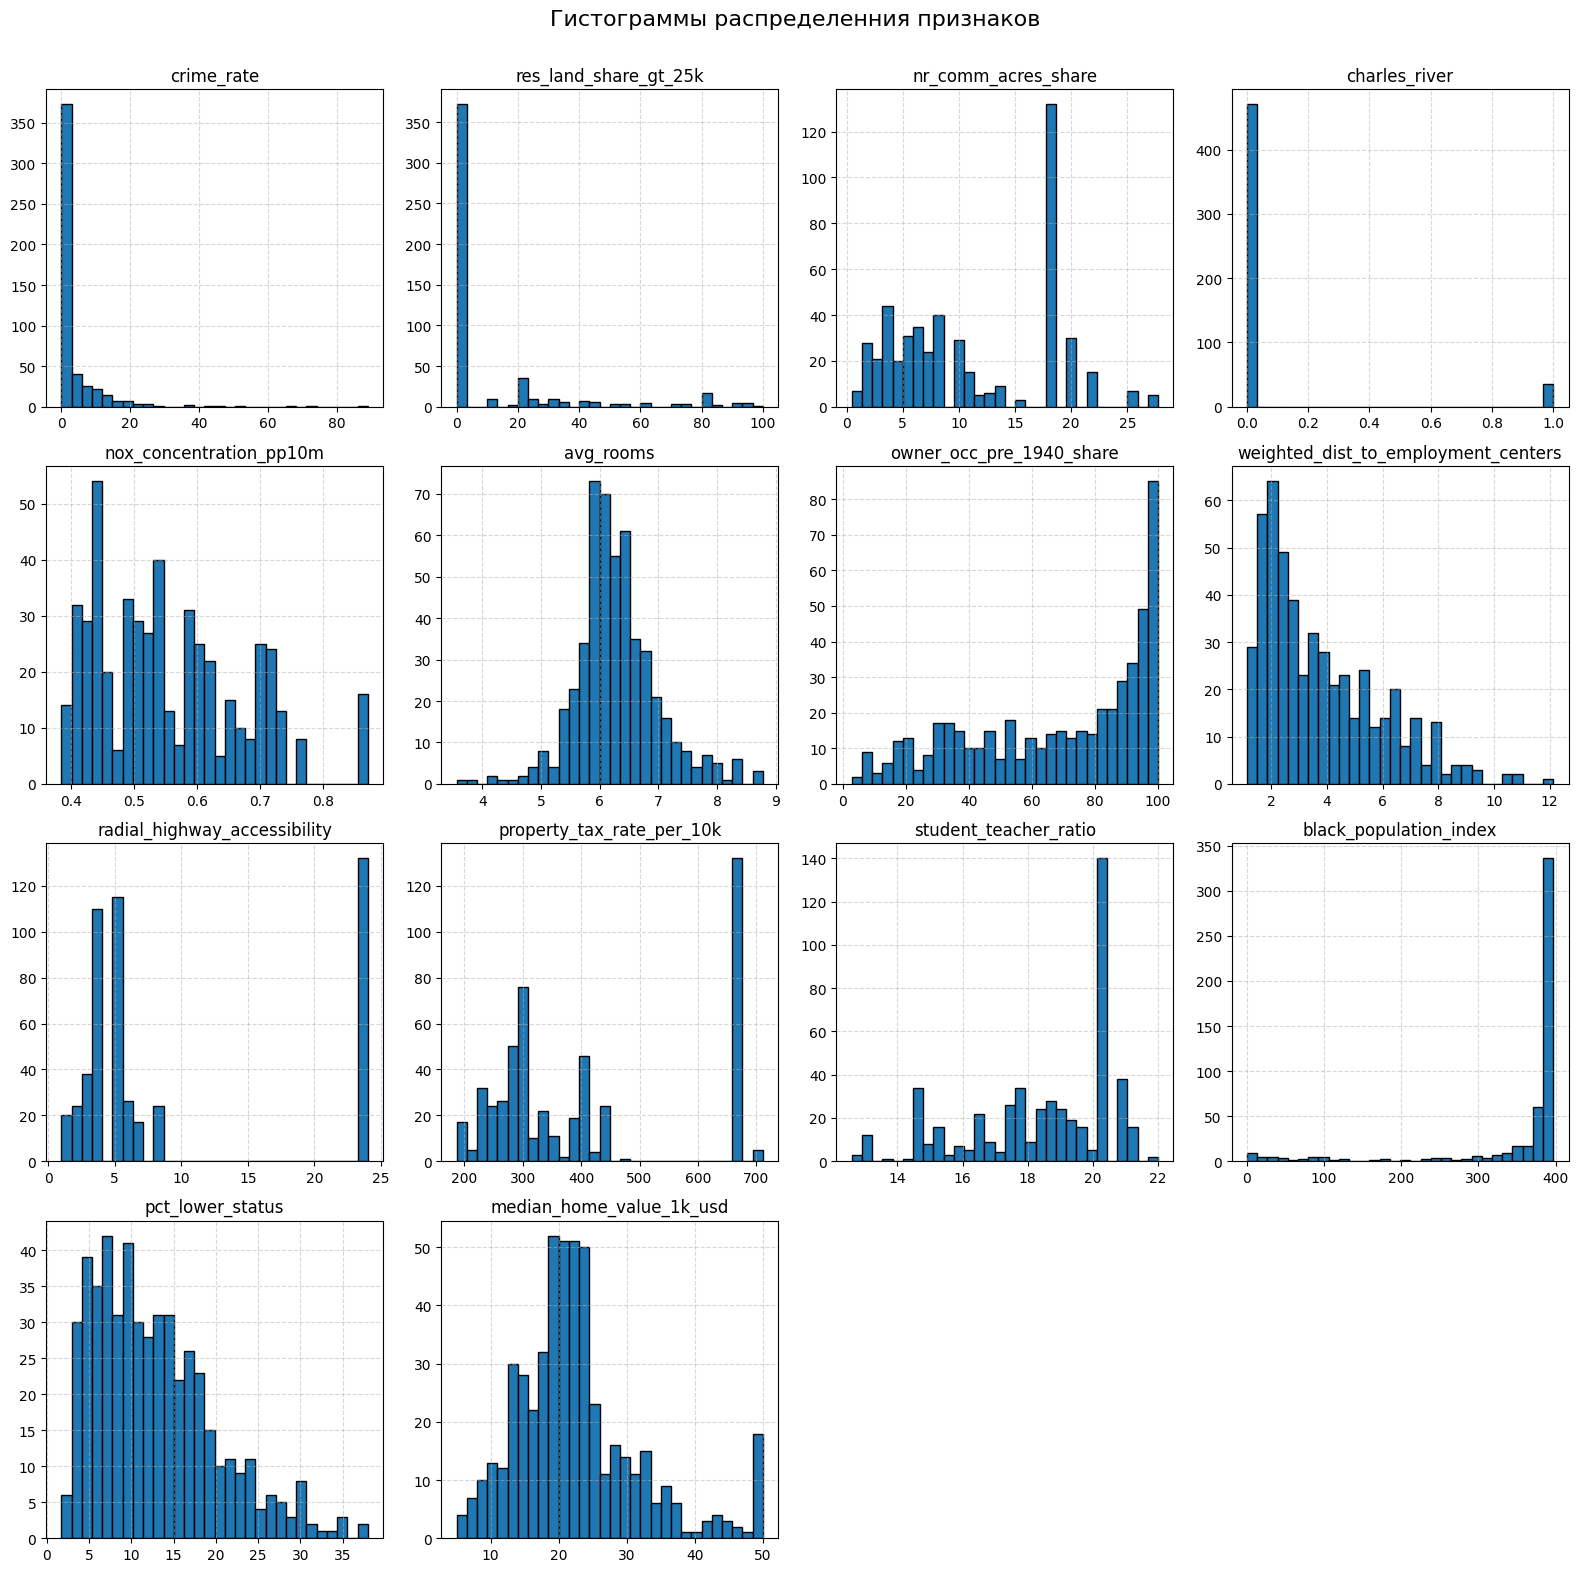

In [9]:
signs = df.columns
n_cols = 4
n_rows = int(np.ceil(len(signs) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = np.array(axes).ravel()

# Построение гистраграмм
for i, col in enumerate(signs):
    axes[i].hist(df[col], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Скрыть пустые графики
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Гистограммы распределенния признаков', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)

### Plotting boxplots for all signs

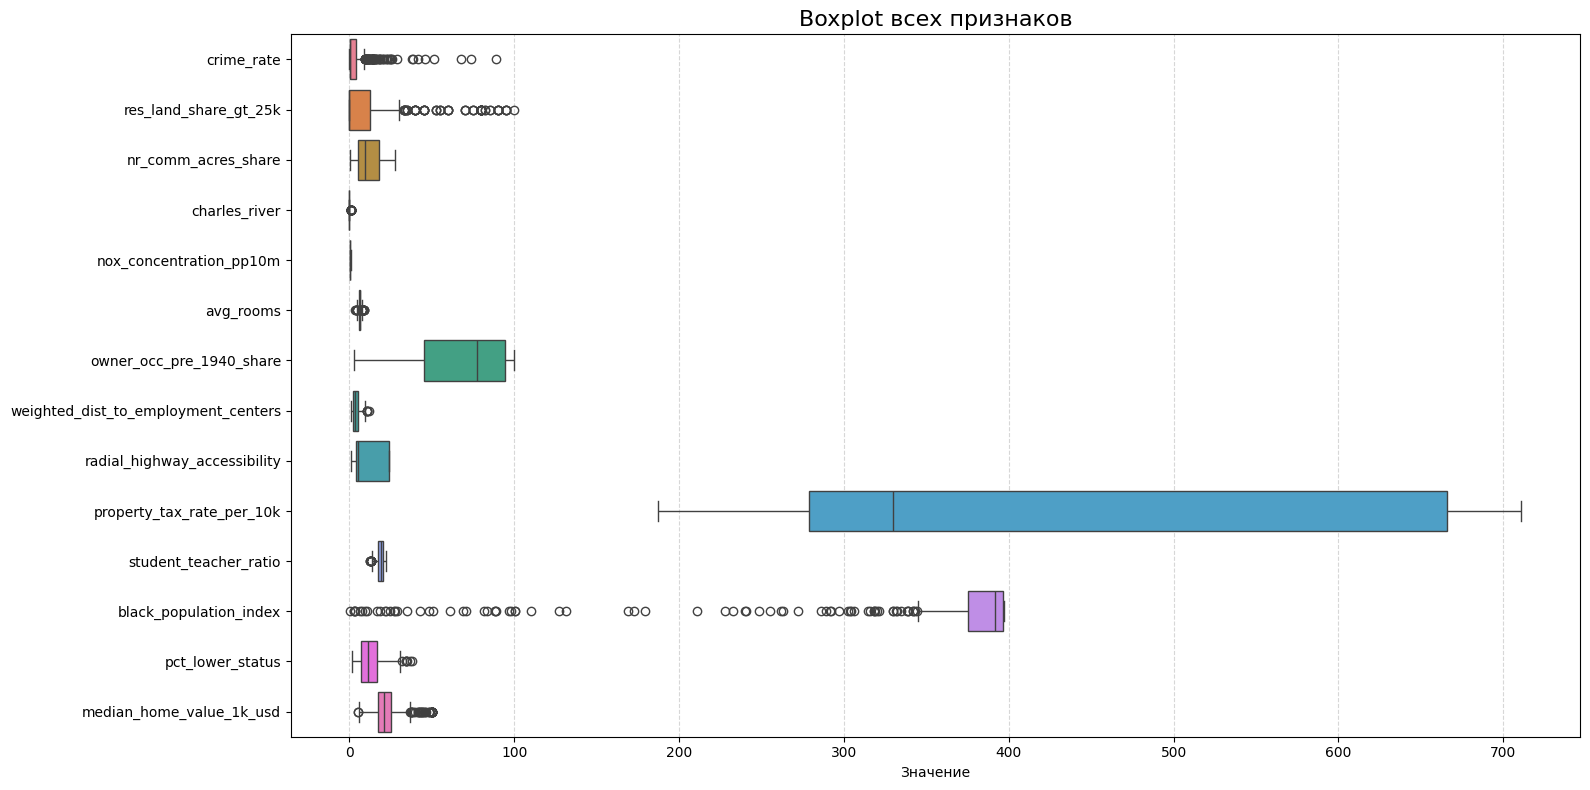

In [59]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=df, orient='h')
plt.title('Boxplot всех признаков', fontsize=16)
plt.xlabel('Значение')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

### The construction of a scattering diagram for all signs with median_home_value_1k_usd

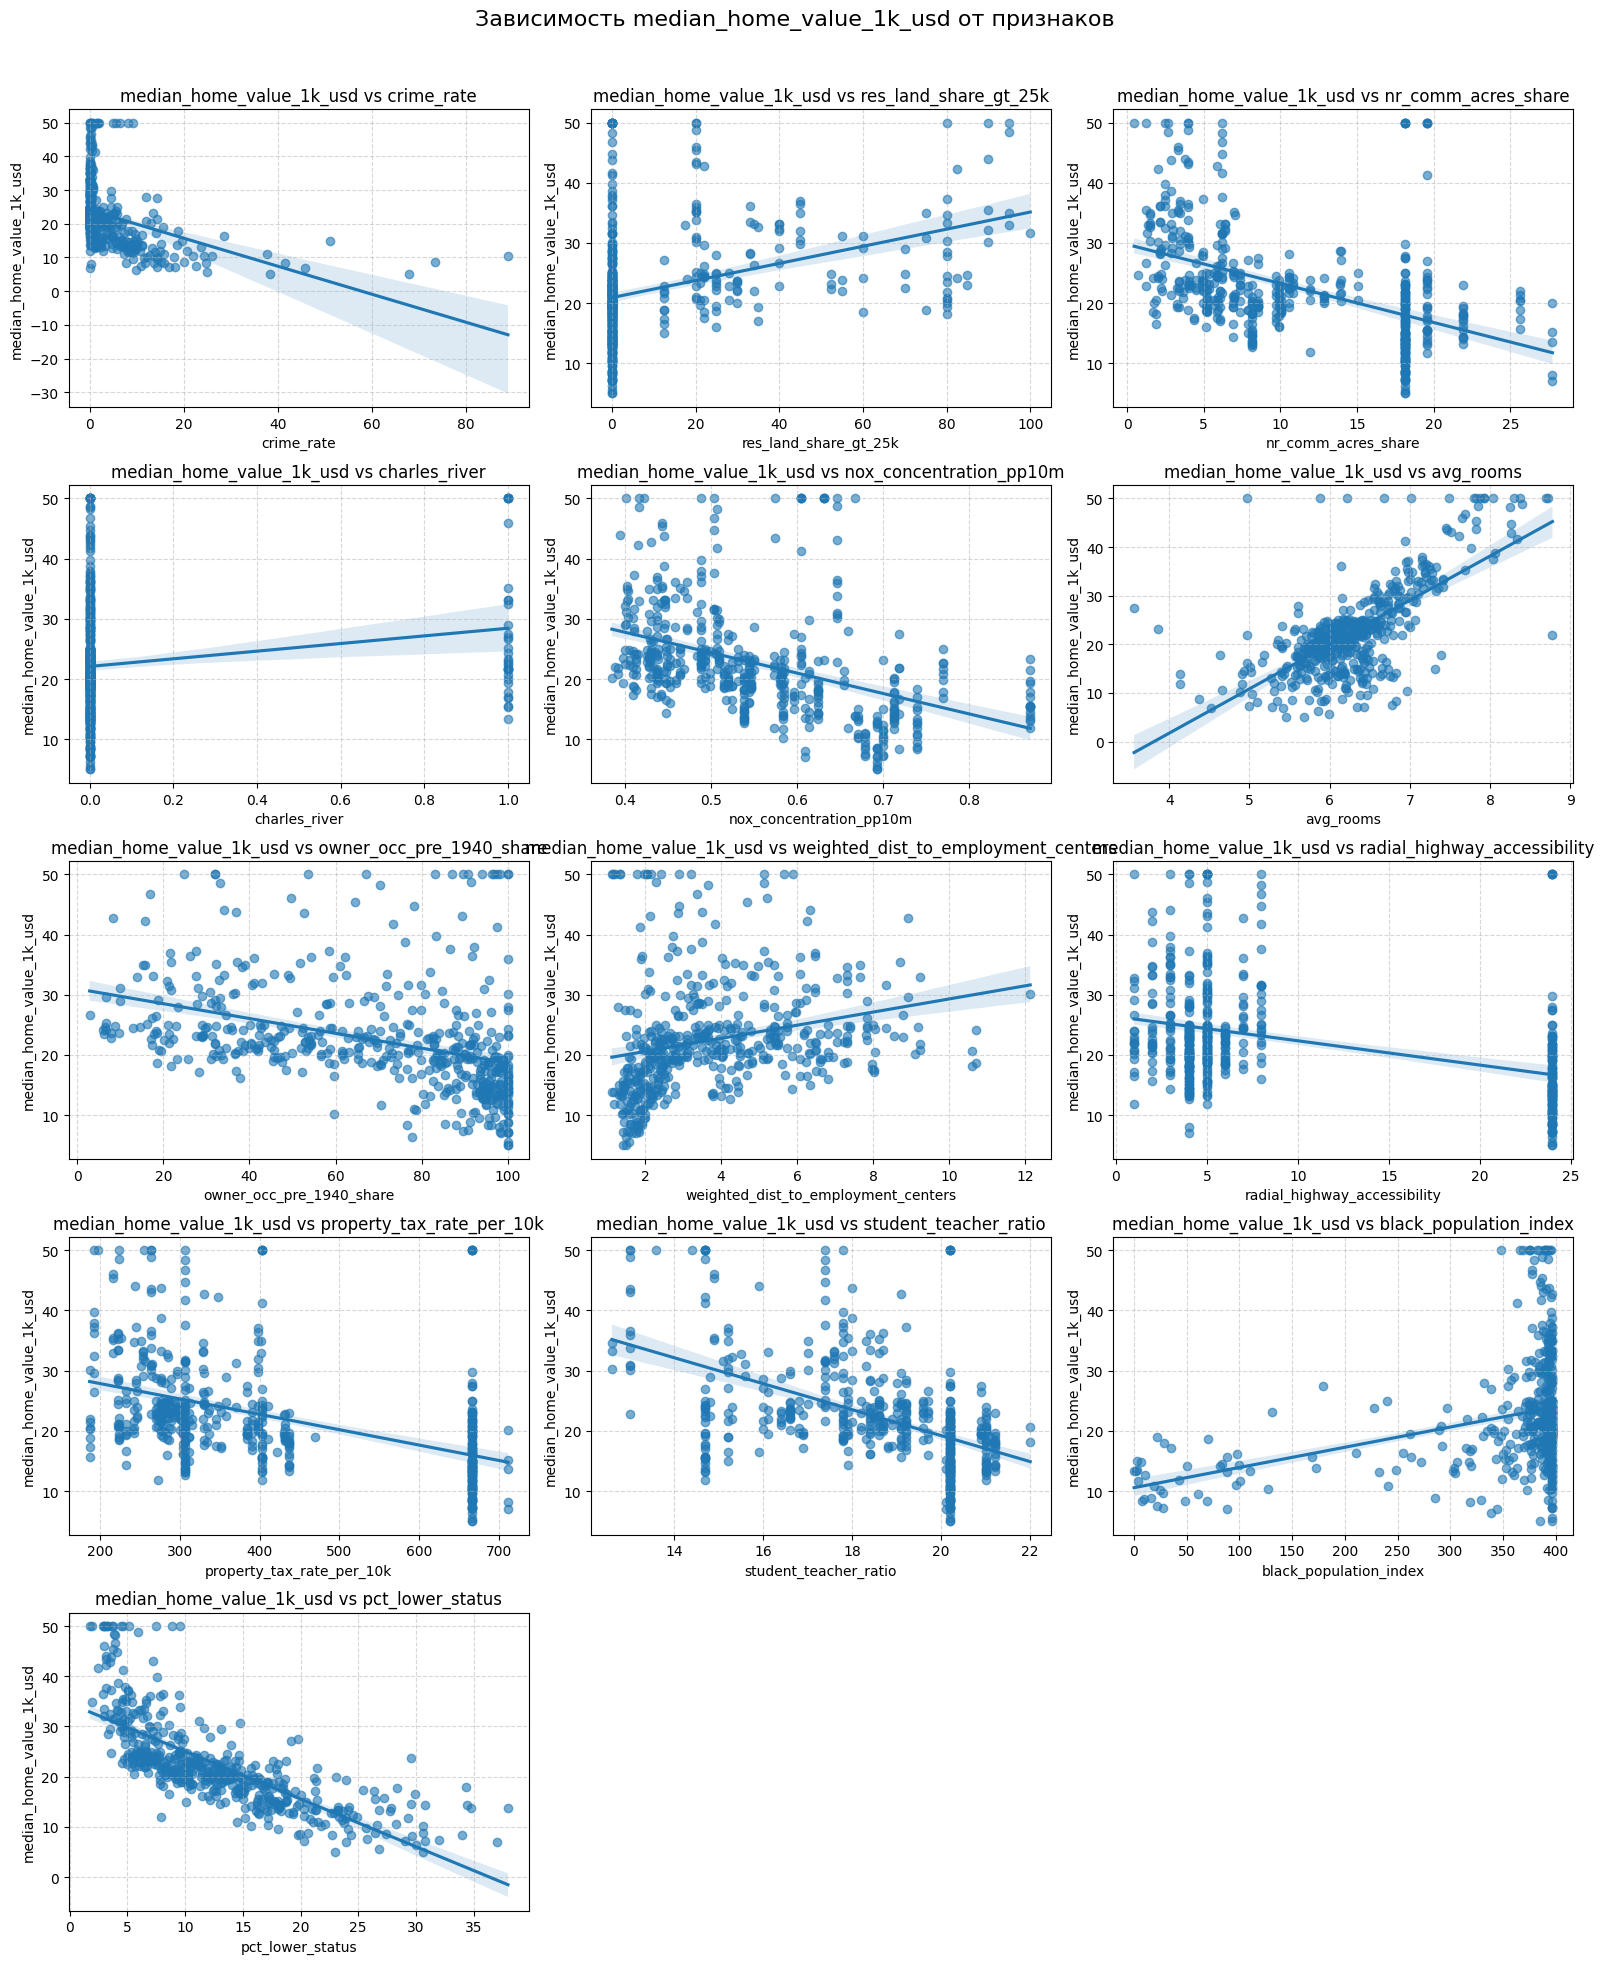

In [20]:
signs = df.columns[:-1]
n_cols = 3
n_rows = int(np.ceil(len(signs) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = np.array(axes).ravel()

for i, col in enumerate(signs):
    sns.regplot(data=df, x=col, y='median_home_value_1k_usd', ax=axes[i],
                scatter_kws={'alpha':0.6})
    axes[i].set_title(f'median_home_value_1k_usd vs {col}')
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Зависимость median_home_value_1k_usd от признаков', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)

### Heatmap of correlation matrix

<Axes: >

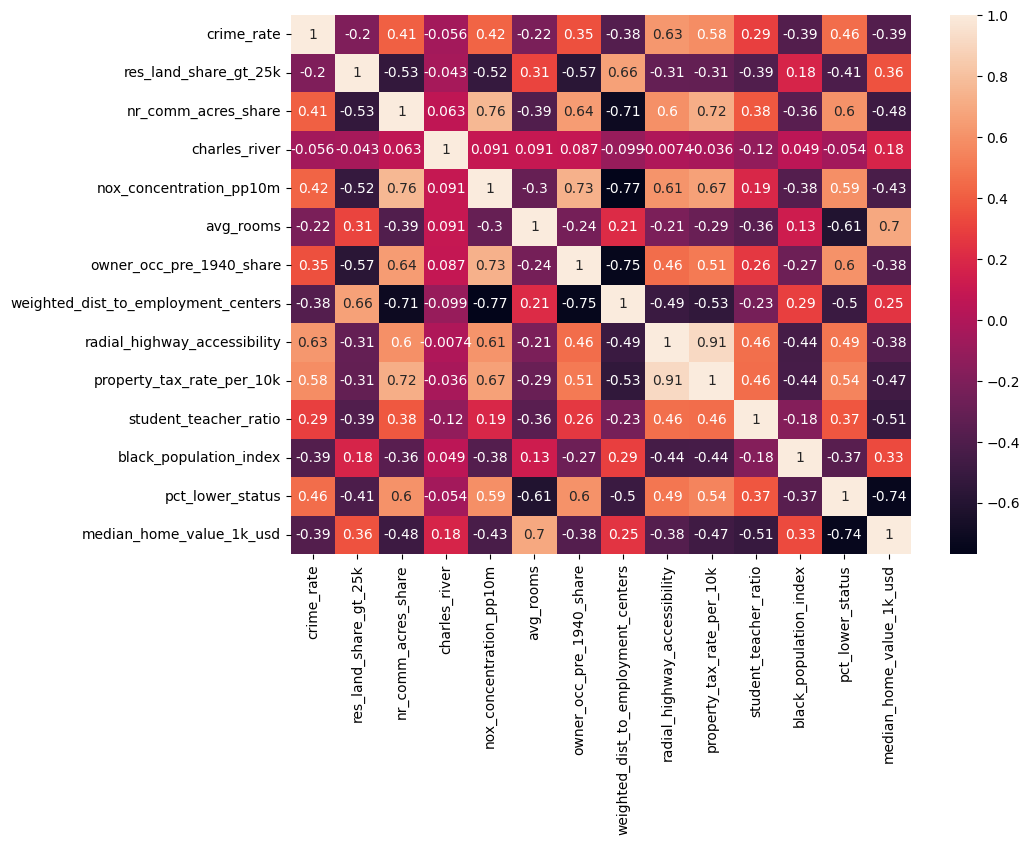

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)